# Questions For Investigation

As a general note, be sure to keep a record of any resources that you use or refer to in the creation of your project. You will need to report your sources as part of the project submission.
#### What is our independent variable? What is our dependent variable?

    Our independent variable is the congruency of the word/color of the words being read.  
    Our dependent variable is the variable we are trying to measure.  In this case, it is the time, in seconds, it takes the participant to read the COLOR of the word shown in the list, despite the word not being congruent with the color of the text.

#### What is an appropriate set of hypotheses for this task? 
   The null hypothesis is that the mean time of the Congruent and Incongruent test of the population will have no statistical difference based on a sample of that population
   $$H_o:  \mu_C = \mu_I $$
   
   The alternative hypothesis is that the mean time of Congruent test of the population will have a statistically different mean time than the Incongruent test times based on a sample of that population
   $$H_a: \mu_C <> \mu_I $$
   
   

#### What kind of statistical test do you expect to perform? 
    A paired T-test would be the best model to evaluate this data set as all items in our sample, except for our independent variables are the same, including the participants. If we had the population mean, we could use the Z-score, but since we only have a small sample, a T-Test is more appropriate.  We used the paired T-Test because we are not interested in which direction a variance in our sample mean occurs, just that a significant difference does occur.


In [1]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
from scipy import stats
import numpy as np
from IPython.display import HTML, display
import pylab as pl
import math

In [2]:
#### Read in our data
df = pd.read_csv('stroopdata.csv')

#### Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [3]:
#### Calculate some basic numbers against the data
cstd = np.std(df['Congruent'])
istd = np.std(df['Incongruent'])
cmean = np.mean(df['Congruent'])
imean = np.mean(df['Incongruent'])


df.describe()


,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


#### Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

The below Histogram charts both Congruent and InCongruent test times, along with their Mean, with this visualization we can easily see that both distributions could be considered normal distrubtions and the mean values of the Incongruent is just over 50% higher.

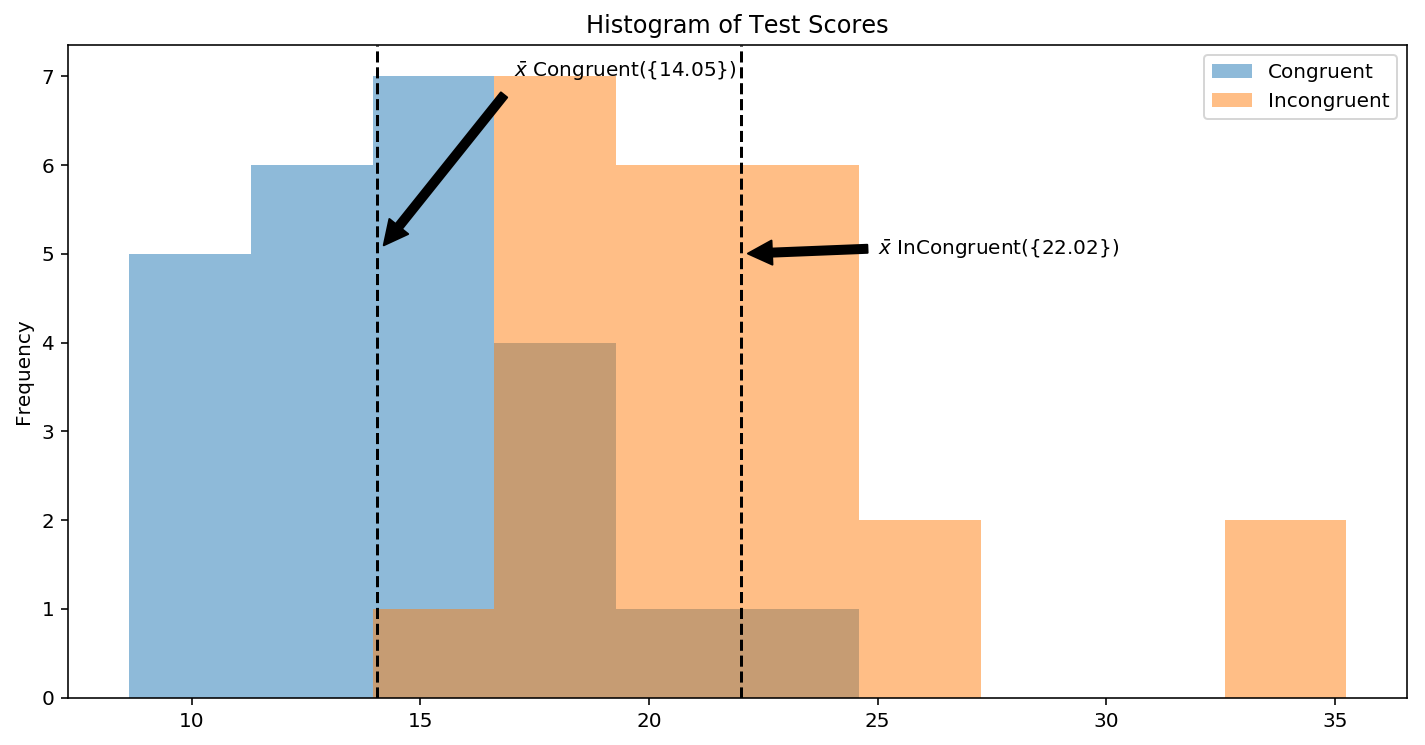

In [4]:
%matplotlib inline
a = df.plot.hist(alpha=0.5,title='Histogram of Test Scores',figsize=(12,6))


### Show Congruent Mean
b = a.axvline(cmean, color='k', linestyle='--')
b = a.annotate(r'$\bar{x}$ Congruent({%.4g})' % cmean, xy=(cmean, 5), xytext=(cmean+3, 7),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

### Show Inongruent Mean
b = a.axvline(imean, color='k', linestyle='--')
b = a.annotate(r'$\bar{x}$ InCongruent({%.4g})' % imean, xy=(imean, 5), xytext=(imean+3, 5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )


#### Now, perform the statistical test and report your results. 

We will choose 95% as our confidence level 

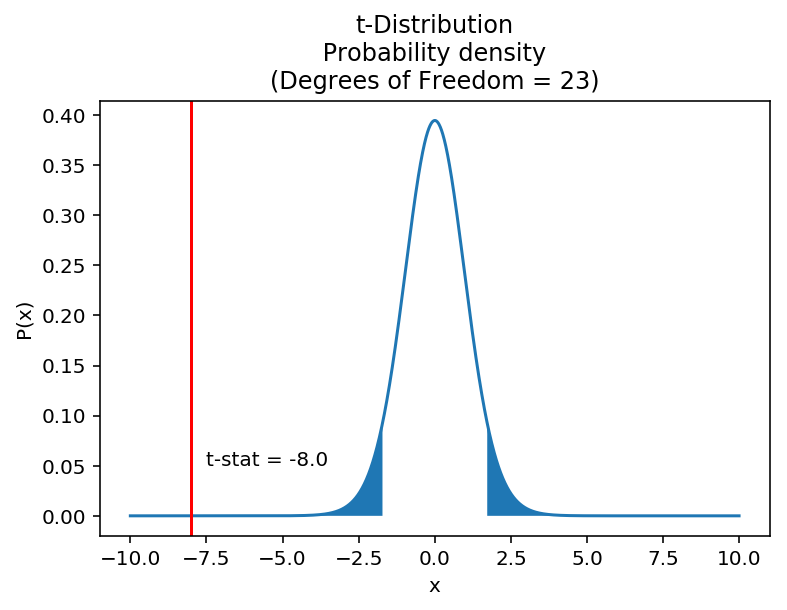

In [5]:
confidence_level = 0.95
degF = len(df)-1                                            ### Count Degrees of Freedom

t_crit = stats.t.ppf(q=confidence_level,                    ### Quantile to check
            df=degF)                                        ### Degrees of freedom

statistic, pvalue = (stats.ttest_rel(                       ### Perform our Paired T-Test to get the statistic
    a = df['Congruent'],                                    ### First Test
    b = df['Incongruent']))                                 ### Second Test 

# Visualize It!!!
graphRange = int(math.ceil(t_crit / 10.0)) * 10             #### Calculate the bounds of our chart by rounding up
graph = np.arange(-(graphRange), graphRange, 0.01)          #### Build a basic chart within our bounds
t_dist = stats.t(degF).pdf                                  ####  Get the distribution in 

a = pl.plot(graph, t_dist(graph))                           ### Using the graph, plot the t-Distribution
a = pl.fill_between(graph, t_dist(graph), where=np.logical_or(graph < -t_crit,graph > t_crit))
a = pl.title("t-Distribution\n Probability density \n(Degrees of Freedom = %s)" % degF)

#### Add the T-Statistic On The Probabilty Graph
a = pl.axvline(statistic, color='r')
a = pl.annotate("t-stat = {:.1f}".format(statistic), xy=(statistic+.5, 0.05))

a = pl.xlabel("x")                                           ### Don't forget the labels
a = pl.ylabel("P(x)")                                        ### Labels!!!



#### What is your confidence level and your critical statistic value? 

In [6]:
print("Confidence Level: %s " % confidence_level)
print("Degrees of Freedom: %s " % degF)
print("T-Critical: %s " % t_crit)


Confidence Level: 0.95 
Degrees of Freedom: 23 
T-Critical: 1.71387152775 


#### Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task.  Did the results match up with your expectations?

Based off the placement of the T-Statistic on the graph, I reject the null hypothesis ($H_o$) and accept the alternate hypothesis ($H_a$) as there is a significant difference between the time taken on the Congruent test and the Incongruent test. Based off my taking of the Stroop Test, I did notice a noticeable difficulty in performing the incongruent test, whereas the congruent test was simply reading, there was no associated thought with the matching of the color of the word versus the text of the word.

#### Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!